In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = "/kaggle/input/board-games-dataset-complete-features/boardgame-geek-dataset_organized.csv"
df = pd.read_csv(file_path)

In [ ]:
df["playing_time"] = (df["min_playtime"] + df["max_playtime"]) / 2

In [ ]:
df = df.rename(columns={"avg_rating": "average_rating", "release_year": "yearpublished"})

In [ ]:
print(df.head())
print(df.info())
print(df.describe())
print("Nota média:", df["average_rating"].mean())
print("Tempo médio:", df["playing_time"].mean(), "Desvio padrão:", df["playing_time"].std())
print("Nulos por coluna:\n", df.isnull().sum())

   row_id                          boardgame  yearpublished  min_players  \
0       1                  Brass: Birmingham           2018            2   
1       2          Pandemic Legacy: Season 1           2015            2   
2       3                           Ark Nova           2021            1   
3       4                         Gloomhaven           2017            1   
4       5  Twilight Imperium: Fourth Edition           2017            3   

   max_players  min_playtime  max_playtime  minimum_age  average_rating  \
0            4            60           120           14           8.575   
1            4            60            60           13           8.512   
2            4            90           150           14           8.539   
3            4            60           120           14           8.557   
4            6           240           480           14           8.572   

   num_ratings  ...  rank_thematic  rank_family  rank_war  rank_customizable  \
0        535

/tmp/ipython-input-2204736743.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["average_rating"].fillna(df["average_rating"].median(), inplace=True)


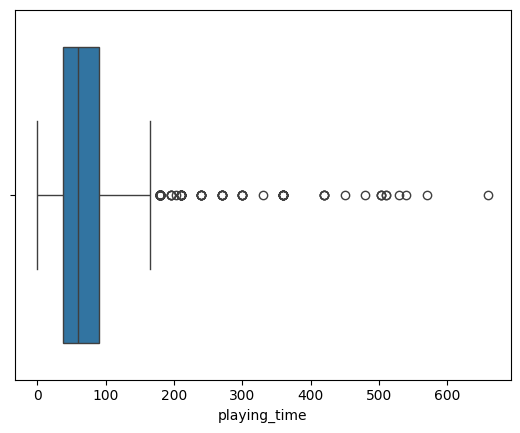

Qtd outliers: 119


In [ ]:
df["average_rating"].fillna(df["average_rating"].median(), inplace=True)
sns.boxplot(x=df["playing_time"])
plt.show()
q1, q3 = df["playing_time"].quantile([0.25, 0.75])
iqr = q3 - q1
outliers = df[(df["playing_time"] < q1 - 1.5*iqr) | (df["playing_time"] > q3 + 1.5*iqr)]
print("Qtd outliers:", len(outliers))

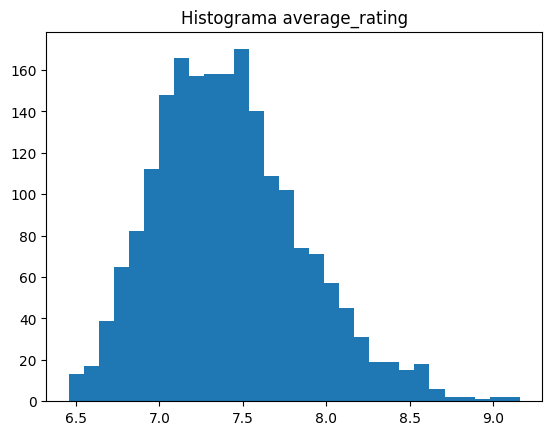

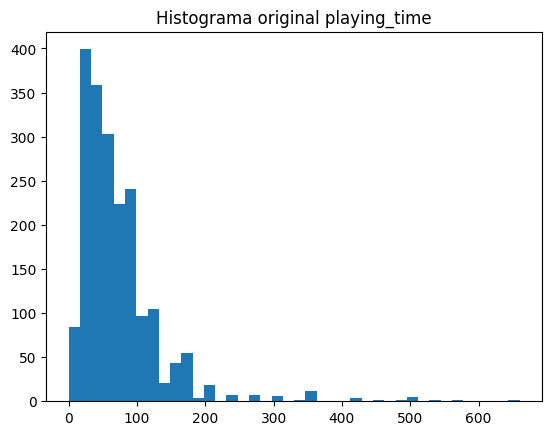

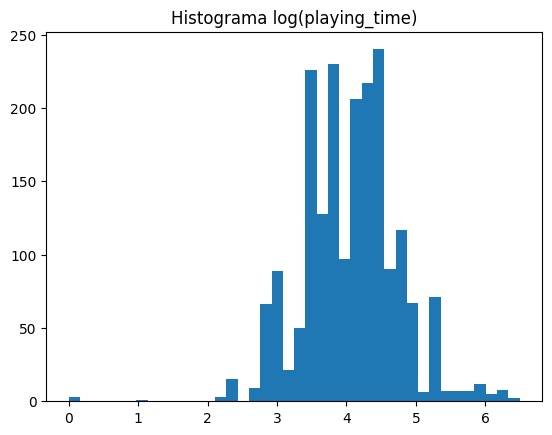

In [ ]:
plt.hist(df["average_rating"], bins=30)
plt.title("Histograma average_rating")
plt.show()
df["playing_time_log"] = np.log1p(df["playing_time"])
plt.hist(df["playing_time"], bins=40)
plt.title("Histograma original playing_time")
plt.show()
plt.hist(df["playing_time_log"], bins=40)
plt.title("Histograma log(playing_time)")
plt.show()

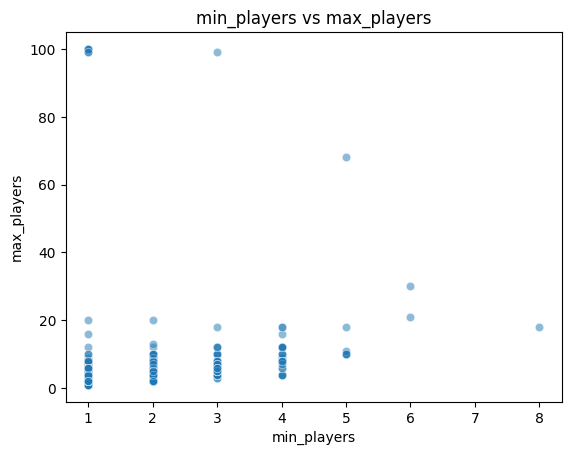

                     row_id  yearpublished  min_players  max_players  \
row_id             1.000000      -0.014429     0.043090     0.005884   
yearpublished     -0.014429       1.000000    -0.068804    -0.181897   
min_players        0.043090      -0.068804     1.000000     0.098884   
max_players        0.005884      -0.181897     0.098884     1.000000   
min_playtime      -0.037907       0.005583     0.021599    -0.039336   
max_playtime      -0.060282       0.003039    -0.104290    -0.038726   
minimum_age       -0.179940       0.119558    -0.141552    -0.097742   
average_rating    -0.477495       0.060397    -0.254746    -0.044696   
num_ratings       -0.509106      -0.030488     0.076977     0.035725   
complexity        -0.222102       0.004491    -0.231912    -0.116246   
rank_overall       0.999998      -0.014435     0.043144     0.005868   
owned             -0.487035      -0.021210     0.049335     0.035908   
wishlisted        -0.645814       0.033893    -0.074385     0.00

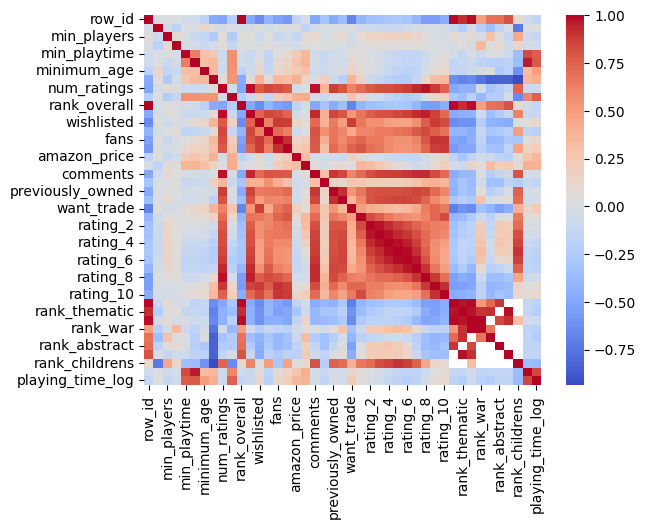

In [ ]:
sns.scatterplot(x="min_players", y="max_players", data=df, alpha=0.5)
plt.title("min_players vs max_players")
plt.show()
print(df.corr(numeric_only=True))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.show()

In [ ]:
df["Decada"] = (df["yearpublished"] // 10) * 10
print("Jogos por década:\n", df["Decada"].value_counts().sort_index())

Jogos por década:
 Decada
0          3
1470       1
1580       1
1630       1
1800       1
1810       1
1850       1
1870       1
1920       1
1950       1
1960       2
1970       9
1980      25
1990      74
2000     280
2010    1031
2020     567
Name: count, dtype: int64
